In [113]:
#importing libreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [14]:
#Read Dataset
titanic_d = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_d.shape

(891, 12)

In [6]:
#check the information of dataset
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Null value check
titanic_d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Age as 177 null values.
titanic_d['Age'].fillna(titanic_d['Age'].mean(),inplace=True)


In [20]:
titanic_d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
# for cabin we can drop this column
titanic_d.drop(columns='Cabin',inplace=True)

In [22]:
titanic_d.shape

(891, 11)

In [23]:
#Fill null in  Embarked columns
titanic_d['Embarked'].value_counts()



S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
#most repeating Embarked is 'S' so we fill Nan with 'S'
titanic_d['Embarked'] = (titanic_d['Embarked'].fillna('S'))

titanic_d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### No null values present in now 

In [26]:
# statistical measure
titanic_d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization 

<AxesSubplot:xlabel='Survived', ylabel='count'>

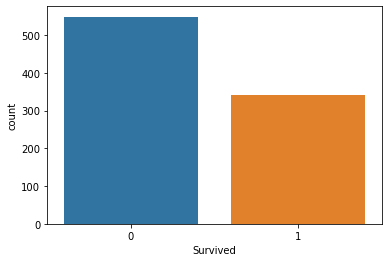

In [28]:
sns.countplot(x='Survived',data=titanic_d)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

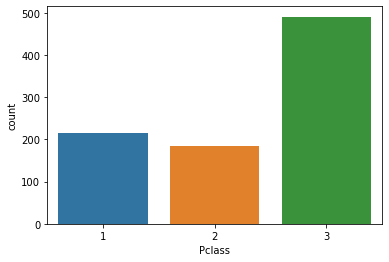

In [32]:
sns.countplot(x='Pclass',data=titanic_d)

<AxesSubplot:xlabel='Age', ylabel='count'>

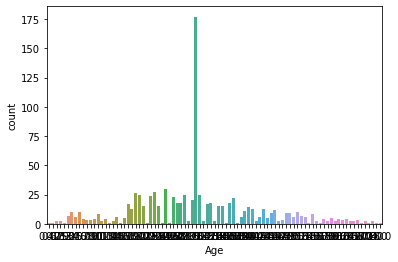

In [33]:
sns.countplot(x='Age',data=titanic_d)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

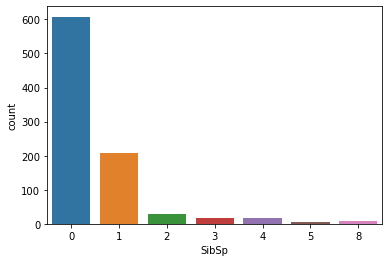

In [34]:
sns.countplot(x='SibSp',data=titanic_d)

<AxesSubplot:xlabel='Parch', ylabel='count'>

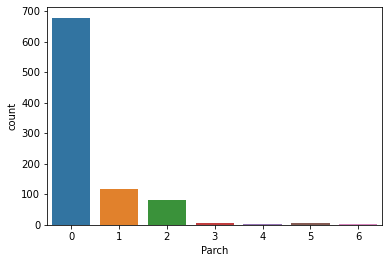

In [35]:
#Parch
sns.countplot(x='Parch',data=titanic_d)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

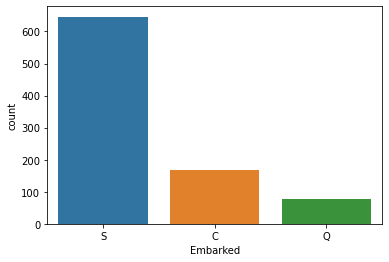

In [36]:
#Embarked
sns.countplot(x='Embarked',data=titanic_d)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

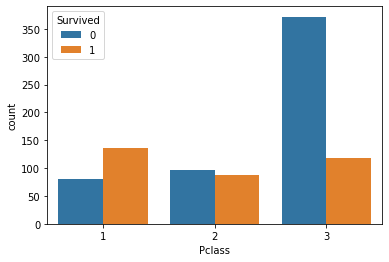

In [31]:
# Survived vs Pclass
sns.countplot('Pclass',hue='Survived',data=titanic_d)


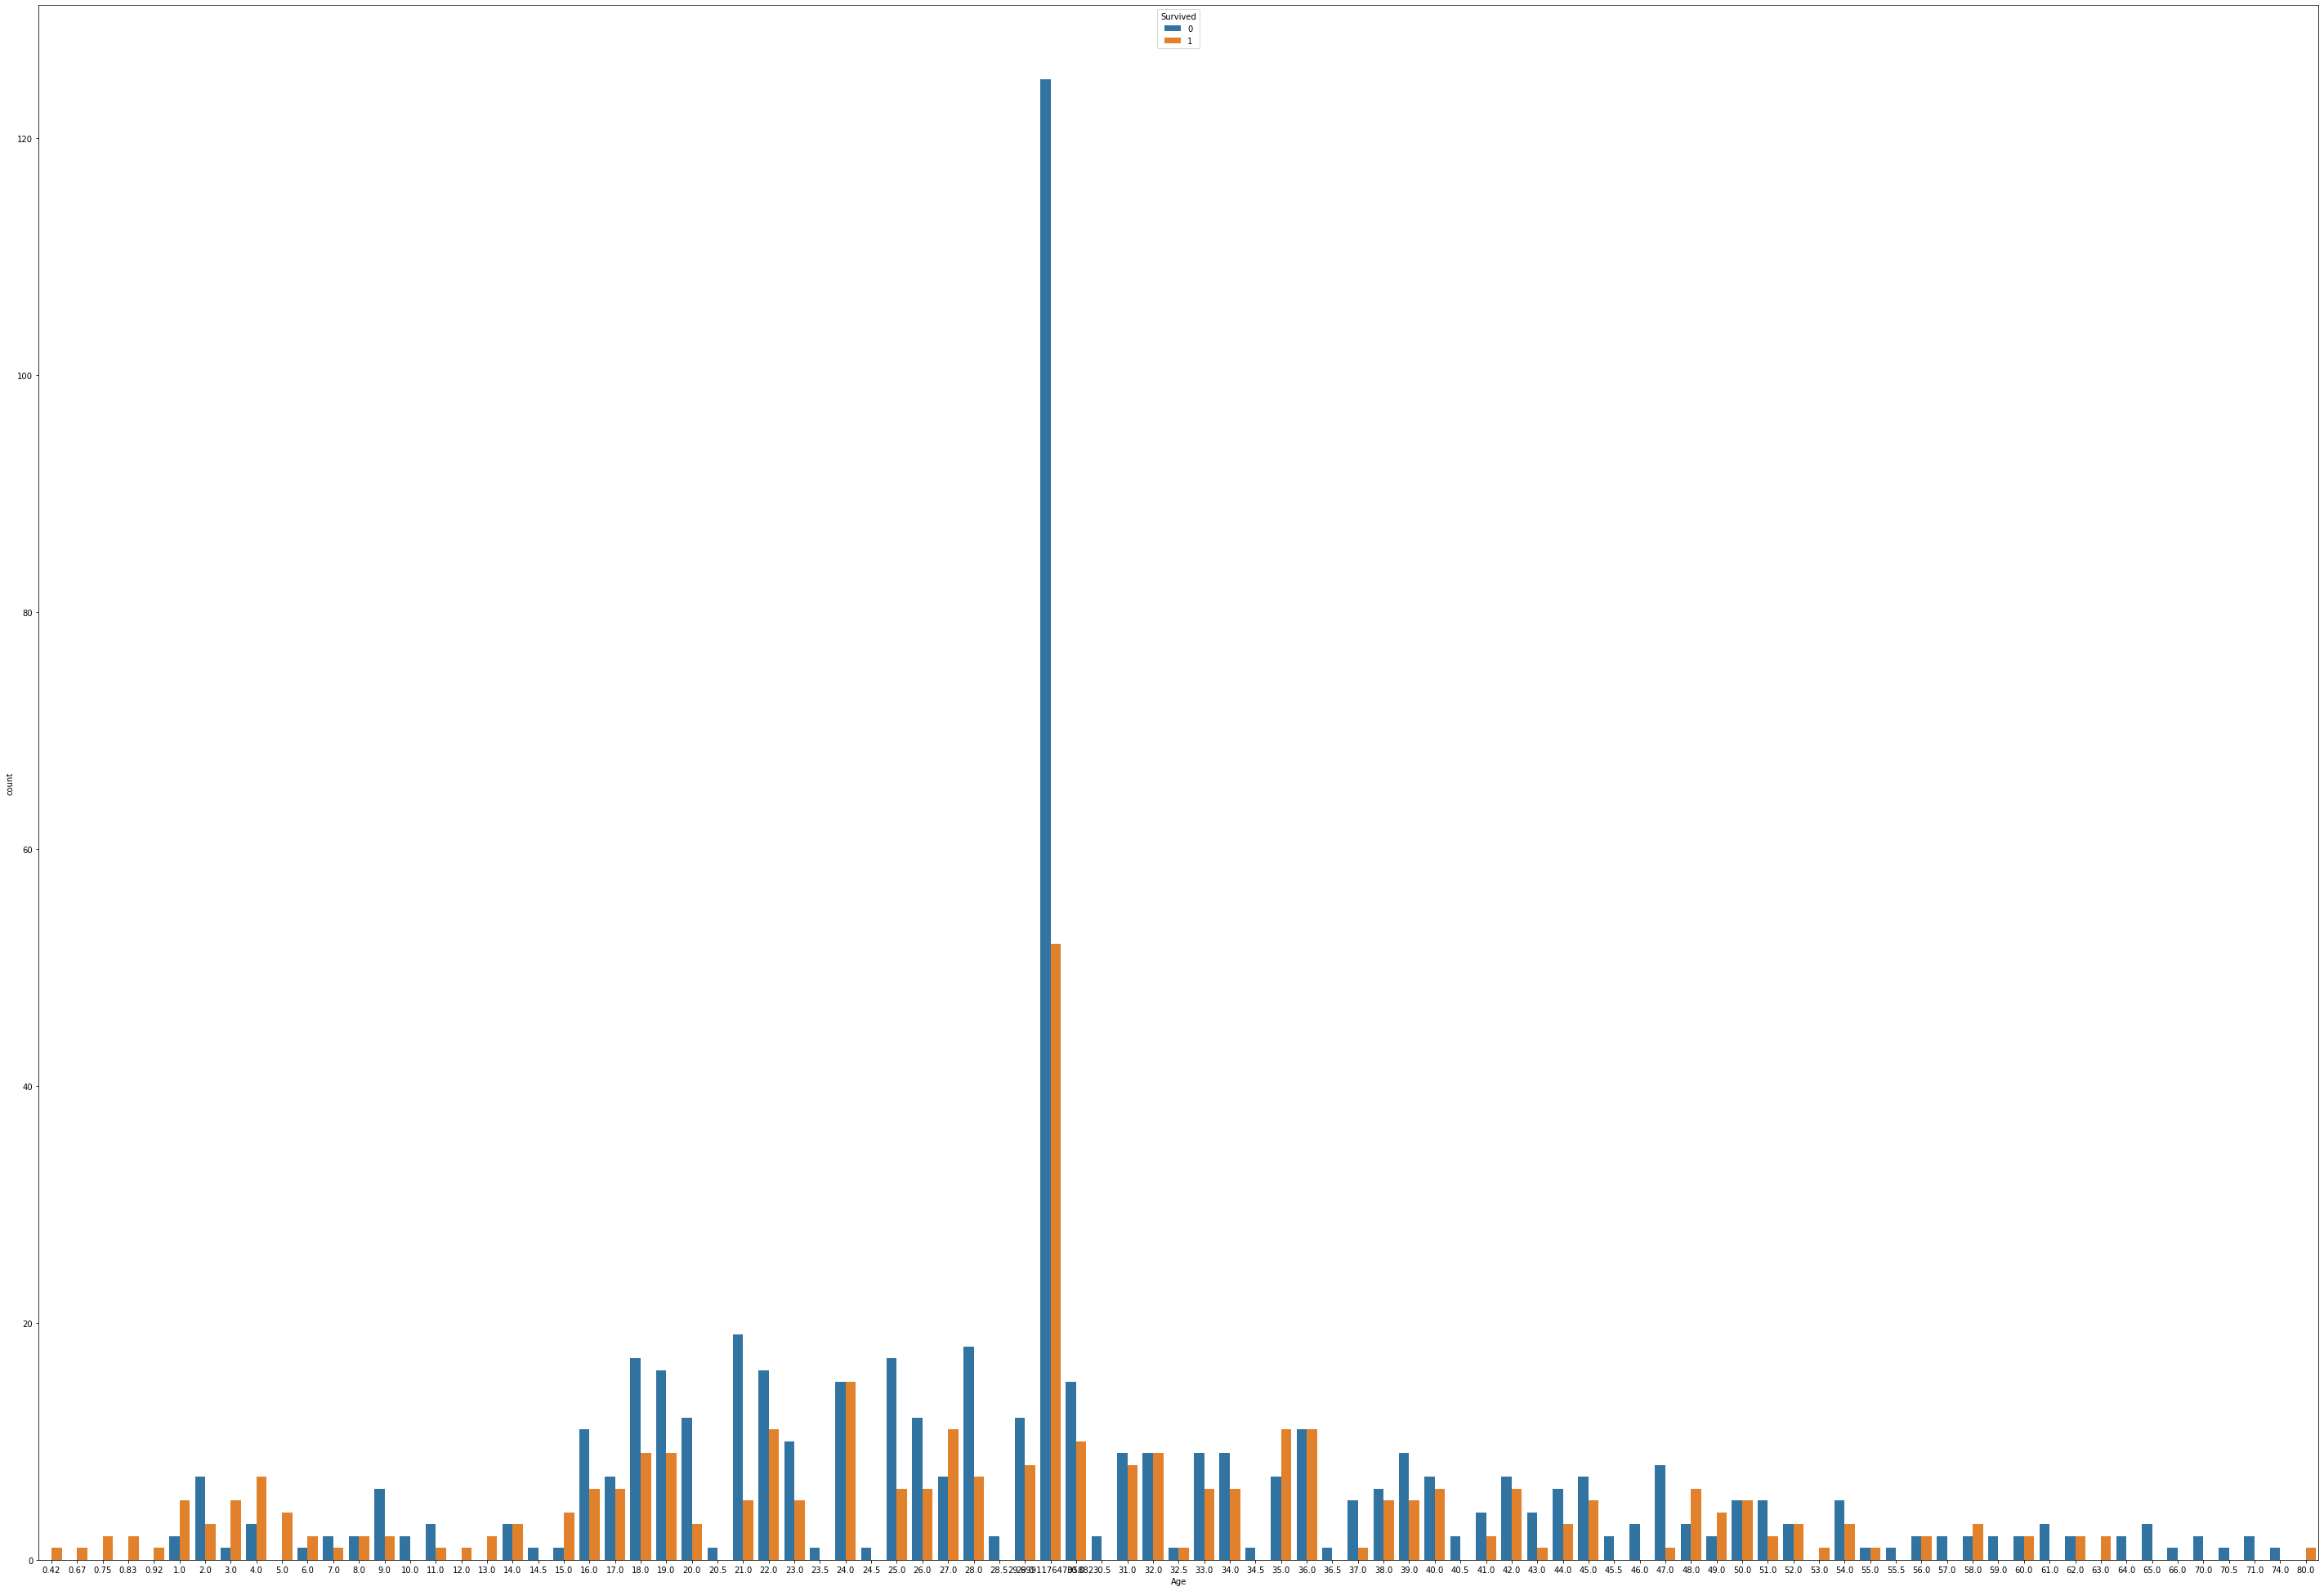

In [67]:
#Survived vs Age
plt.figure(figsize = (50,35))
sns.countplot('Age',hue='Survived',data=titanic_d)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

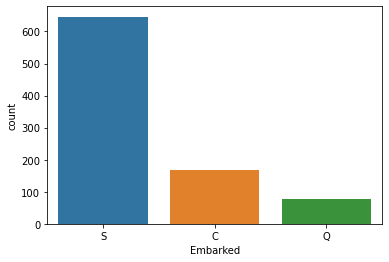

In [68]:
#Embarked
sns.countplot(x='Embarked',data=titanic_d)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

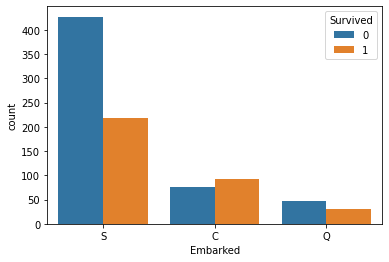

In [70]:
# Embarked vs Survived
sns.countplot('Embarked',hue = 'Survived',data=titanic_d)

In [71]:
#check for useful columns
titanic_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
titanic_d.drop(columns=['PassengerId','Name','Ticket','Fare'],inplace=True)

In [73]:
titanic_d

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [74]:
titanic_d.shape

(891, 7)

### Now we have all categorical columns.so,no need to check for skewness and outliers in it.Let us convert the categorical column into numerical.

In [79]:
titanic_d['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [80]:
titanic_d['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
#Encoding the labels 
titanic_d['Sex']= titanic_d['Sex'].replace({'male':0,'female':1})
titanic_d['Embarked'] = titanic_d['Embarked'].replace({'S':0,'C':1,'Q':2})

In [89]:
titanic_d

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


#### Dividing target and feature columns


In [91]:
x = titanic_d.drop(columns='Survived')
y = titanic_d['Survived']

In [92]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [93]:
#scaling x data

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.75,random_state=50)

In [95]:
print('Training Outcome:\n',y_train.value_counts())

Training Outcome:
 0    419
1    249
Name: Survived, dtype: int64


In [128]:
#logistic Regression

LR = LogisticRegression()  
LR.fit(x_train,y_train)
predrs=LR.predict(x_test)
acc = accuracy_score(y_test,predrs)
confusion_m = confusion_matrix(y_test,predrs)

print("\nBest accuracy score:","\n",acc)
print("\n Confusion_mat:\n",confusion_m)
print('\n')
print("Classification_report:\n",classification_report(y_test,predrs))

print("AUC curvee",roc_auc_score(y_test,predrs))
print("ROC curve")
fpr,tpr,threshoulds = roc_curve(y_test,predrs)
print("fpr-->",fpr,'\n')
print("tpr--->",tpr,'\n')
print("threshoulds--->",threshoulds,'\n')


Best accuracy score: 
 0.8116591928251121

 Confusion_mat:
 [[117  13]
 [ 29  64]]


Classification_report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       130
           1       0.83      0.69      0.75        93

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

AUC curvee 0.7940860215053764
ROC curve
fpr--> [0.  0.1 1. ] 

tpr---> [0.         0.68817204 1.        ] 

threshoulds---> [2 1 0] 



In [130]:
#Tunning the parameter using GridSearchCV
clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train_ns,y_train_ns)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Confusion_mat:",'\n',rf_conf_mat)
print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print('\n')
report =classification_report(y_test,y_pred)
print(report)

print('\n-----------------\n')
print("AUC curvee",roc_auc_score(y_test,y_pred))
print("ROC curve")
fpr,tpr,threshoulds = roc_curve(y_test,y_pred)
print("fpr-->",fpr,'\n')
print("tpr--->",tpr,'\n')
print("threshoulds--->",threshoulds,'\n')

best_params= > {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 Confusion_mat: 
 [[118  12]
 [ 34  59]]

 Accuracy RandomForest Normal===> 0.7937219730941704


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       130
           1       0.83      0.63      0.72        93

    accuracy                           0.79       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.79      0.79       223


-----------------

AUC curvee 0.7710504549214227
ROC curve
fpr--> [0.         0.09230769 1.        ] 

tpr---> [0.        0.6344086 1.       ] 

threshoulds---> [2 1 0] 



In [131]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print("\n Confusion_mat:\n",confusion_matrix(y_test,pred_dt))
print('\n')
print("Classification_report:\n",classification_report(y_test,pred_dt))

print('\n-----------------\n')
print("AUC curvee",roc_auc_score(y_test,pred_dt))
print("ROC curve")
fpr,tpr,threshoulds = roc_curve(y_test,pred_dt)
print("fpr-->",fpr,'\n')
print("tpr--->",tpr,'\n')
print("threshoulds--->",threshoulds,'\n')

Accuracy 79.37219730941703

 Confusion_mat:
 [[114  16]
 [ 30  63]]


Classification_report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.80      0.68      0.73        93

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223


-----------------

AUC curvee 0.7771712158808932
ROC curve
fpr--> [0.         0.12307692 1.        ] 

tpr---> [0.         0.67741935 1.        ] 

threshoulds---> [2 1 0] 



In [132]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred_svc)*100,"\n")
print("Confusion_matrics:\n",confusion_matrix(y_test,pred_svc),"\n")
print("Classification_report:\n",classification_report(y_test,pred_svc))

print('\n-----------------\n')
print("AUC curvee",roc_auc_score(y_test,pred_svc))
print("ROC curve")
fpr,tpr,threshoulds = roc_curve(y_test,pred_svc)
print("fpr-->",fpr,'\n')
print("tpr--->",tpr,'\n')
print("threshoulds--->",threshoulds,'\n')

Accuracy 82.95964125560538 

Confusion_matrics:
 [[126   4]
 [ 34  59]] 

Classification_report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       130
           1       0.94      0.63      0.76        93

    accuracy                           0.83       223
   macro avg       0.86      0.80      0.81       223
weighted avg       0.85      0.83      0.82       223


-----------------

AUC curvee 0.8018196856906534
ROC curve
fpr--> [0.         0.03076923 1.        ] 

tpr---> [0.        0.6344086 1.       ] 

threshoulds---> [2 1 0] 



### cross validation

In [124]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(LR,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean(),"\n")

crv = cross_val_score(clf,x,y,cv=10)
print("Cross validation score of RandomForestClassifier",crv.mean(),"\n")

crv = cross_val_score(dt,x,y,cv=10)
print("Cross validation score of Decision Tree Model",crv.mean(),"\n")

crv = cross_val_score(svc,x,y,cv=10)
print("Cross validation score of SVC Model",crv.mean(),"\n")


Cross validation score of LogisticRegression Model 0.7979650436953808 

Cross validation score of RandomForestClassifier 0.8271910112359551 

Cross validation score of Decision Tree Model 0.7834956304619226 

Cross validation score of SVC Model 0.6386267166042447 



#### Cross validation score also showing the same results compared to actual. LogisticRegression and DecisionTree shows almost same results 

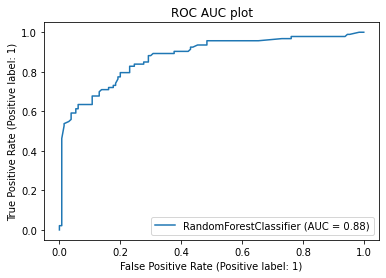

In [135]:
#ROC and AUC plot
from sklearn.metrics import plot_roc_curve

plot_roc_curve(grd.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [139]:
#saving the model in pickle format
import joblib
joblib.dump(grd.best_estimator_,"titanic.pkl")

['titanic.pkl']